In [11]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as matcm
import fsrtools.view_tools as fsrview
import fsrtools.simulate_tools as fsrsimulate
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

marker_list_1 = ['v','>','^','<','o','x','+','s','d']
marker_list_2 = ['o','s','^','D','X','p','h']
marker_list_3 = [4,5,6,7]
markersize = 10
plt.rcParams["font.size"] = 18
basic_size = 7

result_directory_name = 'TrialExperiments/'
src_directory_path = os.path.abspath('../QDproject/results/')

result_directory_path = os.path.join(src_directory_path,result_directory_name)
os.path.exists(result_directory_path)

True

In [12]:
fsrplot = fsrview.PlotManager(top_directory=result_directory_path)
result_data_map = fsrplot.result_data_map()
result_dataframe = pd.DataFrame.from_dict(result_data_map, orient='index')
result_dataframe

,files,directory,parameters,time_info,common_directory,common_parameter_number,variable_parameters,common_parameters
1,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-1,"{'N': 1, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.1, 't': 10.0, 'N_time': 100, 'T': 2.0, 'tagged': 0, 'relaxation': False, 'discrete': True, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-1/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:27:29', 'end_time': '2019/06/24 19:27:30', 'duration': '0:00:00.467462'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29,0,"{'N': 1, 'dt': 0.1, 'N_time': 100, 'tagged': 0, 'discrete': True}","{'command_name': 'xy_open_system', 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
2,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-2,"{'N': 1, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.1, 't': 10.0, 'N_time': 100, 'T': 2.0, 'tagged': 0, 'relaxation': False, 'discrete': False, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-2/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:27:30', 'end_time': '2019/06/24 19:27:30', 'duration': '0:00:00.460754'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29,0,"{'N': 1, 'dt': 0.1, 'N_time': 100, 'tagged': 0, 'discrete': False}","{'command_name': 'xy_open_system', 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
3,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-3,"{'N': 1, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.01, 't': 10.0, 'N_time': 1000, 'T': 2.0, 'tagged': 0, 'relaxation': False, 'discrete': True, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-3/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:27:30', 'end_time': '2019/06/24 19:27:32', 'duration': '0:00:02.040384'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29,0,"{'N': 1, 'dt': 0.01, 'N_time': 1000, 'tagged': 0, 'discrete': True}","{'command_name': 'xy_open_system', 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
4,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-4,"{'N': 1, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.01, 't': 10.0, 'N_time': 1000, 'T': 2.0, 'tagged': 0, 'relaxation': False, 'discrete': False, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-4/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:27:32', 'end_time': '2019/06/24 19:27:34', 'duration': '0:00:02.201908'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29,0,"{'N': 1, 'dt': 0.01, 'N_time': 1000, 'tagged': 0, 'discrete': False}","{'command_name': 'xy_open_system', 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
5,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-5,"{'N': 1, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.001, 't': 10.0, 'N_time': 10000, 'T': 2.0, 'tagged': 0, 'relaxation': False, 'discrete': True, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-5/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:27:34', 'end_time

# Ising models 

## comparing analytical results

\begin{align}
\langle E \rangle & = \frac{\mathrm{Tr} [H e^{-\beta H}]}{Z} \\
H & = \sum_{i=0}^N h S_z^i + V S_x^i  \\
\langle E \rangle & = -\sqrt{h^2 + V^2}N\tanh(\sqrt{h^2 + V^2}\beta))
\end{align}


In [13]:
target_results_1_2 = [x for x in result_dataframe.index if \
                    result_dataframe.loc[x,'parameters']['command_name'] == 'ising_open_system' and \
                    result_dataframe.loc[x,'parameters']['t'] == 10 and \
                    result_dataframe.loc[x,'parameters']['dt'] != 1.0 and \
                    result_dataframe.loc[x,'parameters']['N'] == 3 and \
                    result_dataframe.loc[x,'parameters']['h'] == 1.0 and \
                    result_dataframe.loc[x,'parameters']['J'] == 0.0 and \
                    result_dataframe.loc[x,'parameters']['discrete'] in [False] and \
                    len(result_dataframe.loc[x,'files']) == 4]
result_dataframe.loc[target_results_1_2,:]

,files,directory,parameters,time_info,common_directory,common_parameter_number,variable_parameters,common_parameters
80,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-52-02/experiment_1/number-8,"{'N': 3, 'J': 0.0, 'h': 1.0, 'V': 1.0, 'coef': 1.0, 'dt': 0.1, 't': 10.0, 'N_time': 100, 'T': 2.0, 'tagged': 1, 'relaxation': False, 'discrete': False, 'result_directory': 'results/TrialExperiments/2019-06-24-19-52-02/experiment_1/number-8/', 'command_name': 'ising_open_system'}","{'start_time': '2019/06/24 19:52:47', 'end_time': '2019/06/24 19:52:47', 'duration': '0:00:00.675111'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-52-02,3,"{'N': 3, 'dt': 0.1, 'N_time': 100, 'tagged': 1, 'discrete': False}","{'command_name': 'ising_open_system', 'J': 0.0, 'h': 1.0, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
82,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-52-02/experiment_1/number-10,"{'N': 3, 'J': 0.0, 'h': 1.0, 'V': 1.0, 'coef': 1.0, 'dt': 0.01, 't': 10.0, 'N_time': 1000, 'T': 2.0, 'tagged': 1, 'relaxation': False, 'discrete': False, 'result_directory': 'results/TrialExperiments/2019-06-24-19-52-02/experiment_1/number-10/', 'command_name': 'ising_open_system'}","{'start_time': '2019/06/24 19:52:50', 'end_time': '2019/06/24 19:52:54', 'duration': '0:00:03.394893'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-52-02,3,"{'N': 3, 'dt': 0.01, 'N_time': 1000, 'tagged': 1, 'discrete': False}","{'command_name': 'ising_open_system', 'J': 0.0, 'h': 1.0, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
84,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-52-02/experiment_1/number-12,"{'N': 3, 'J': 0.0, 'h': 1.0, 'V': 1.0, 'coef': 1.0, 'dt': 0.001, 't': 10.0, 'N_time': 10000, 'T': 2.0, 'tagged': 1, 'relaxation': False, 'discrete': False, 'result_directory': 'results/TrialExperiments/2019-06-24-19-52-02/experiment_1/number-12/', 'command_name': 'ising_open_system'}","{'start_time': '2019/06/24 19:53:25', 'end_time': '2019/06/24 19:53:57', 'duration': '0:00:31.666258'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-52-02,3,"{'N': 3, 'dt': 0.001, 'N_time': 10000, 'tagged': 1, 'discrete': False}","{'command_name': 'ising_open_system', 'J': 0.0, 'h': 1.0, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"


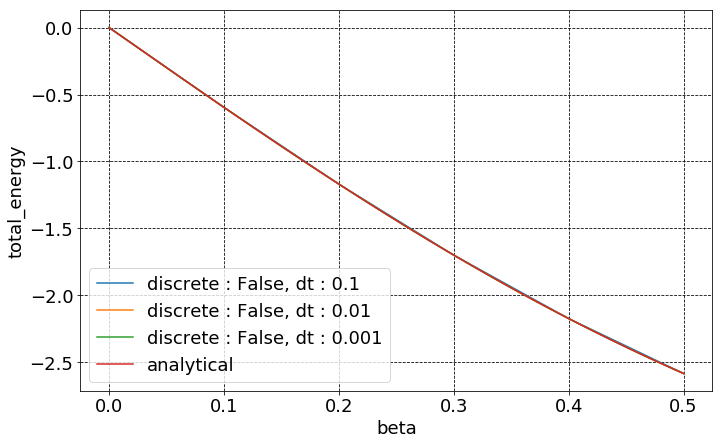

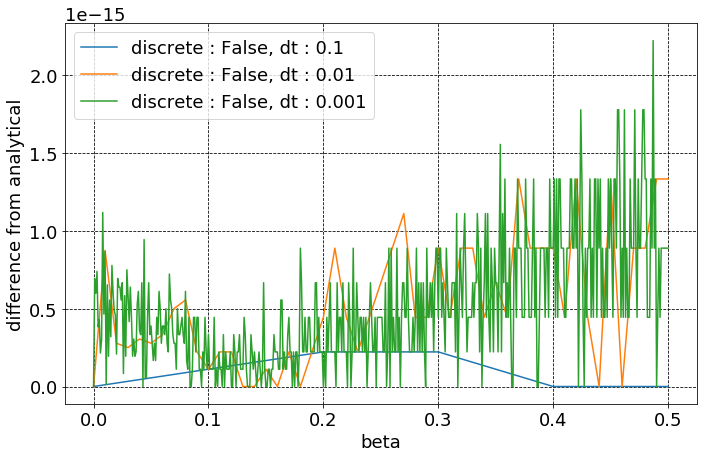

In [14]:
result_file = 'result_thermalize.dat'
y_key = 'total_energy'
x_key = 'beta'
fig, ax = plt.subplots(figsize=(basic_size*1.618,basic_size))
fig1, ax1 = plt.subplots(figsize=(basic_size*1.618,basic_size))
for each_result in target_results_1_2:
    result_data, value_list, plot_type = fsrplot.data_load(
                                        directory=each_result,
                                        file=result_file,
                                        plot_type='normal',
                                        silent=True)
    Y = result_data[y_key].copy()
    X = result_data[x_key].copy()
    V = result_dataframe.loc[each_result,'parameters']['V']
    h = result_dataframe.loc[each_result,'parameters']['h']
    N = result_dataframe.loc[each_result,'parameters']['N']
    Y_analytical =  -N*np.sqrt(h*h + V*V)*np.tanh(np.sqrt(h*h + V*V)*X)
    label = 'discrete : {}, dt : {}'.format(
        result_dataframe.loc[each_result,'parameters']['discrete'],
        result_dataframe.loc[each_result,'parameters']['dt'])
    ax.plot(X, Y, linestyle='-',label=label)
    ax1.plot(X, np.absolute(Y-Y_analytical), linestyle='-',label=label)
ax.plot(X, Y_analytical, linestyle='-',label='analytical')
ax.set_ylabel(y_key)
ax.set_xlabel(x_key)
ax.legend(loc='lower left')
ax1.set_ylabel('difference from analytical')
ax1.set_xlabel(x_key)
ax1.legend(loc='upper left')
ax.grid(which="both",color="black",linestyle="--")
ax1.grid(which="both",color="black",linestyle="--")
plt.show()

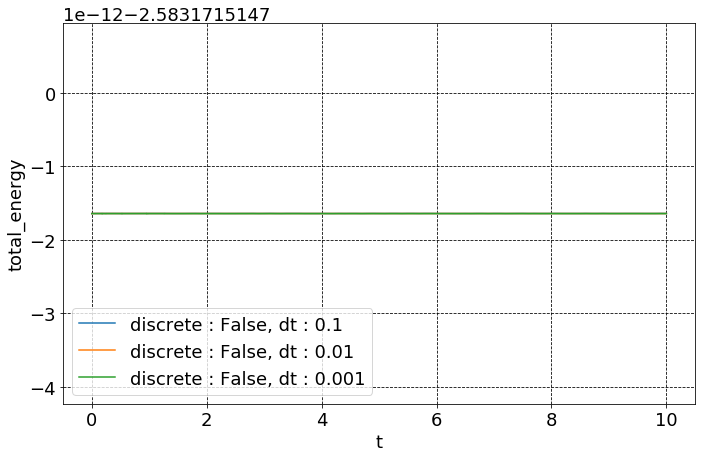

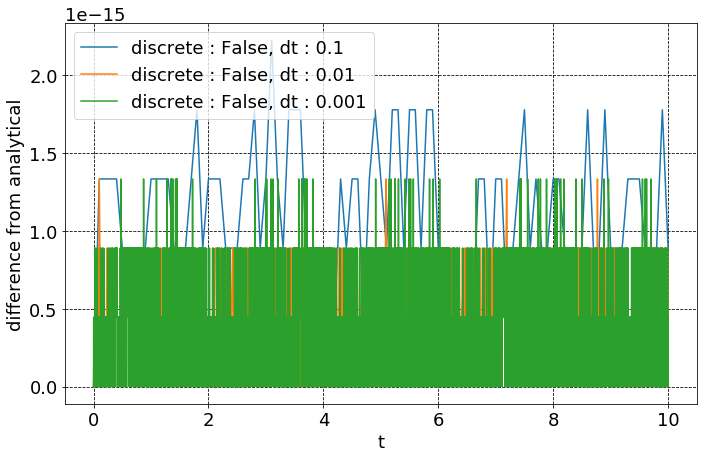

In [15]:
result_file = 'result_timedev.dat'
y_key = 'total_energy'
x_key = 't'
fig, ax = plt.subplots(figsize=(basic_size*1.618,basic_size))
fig1, ax1 = plt.subplots(figsize=(basic_size*1.618,basic_size))
for each_result in target_results_1_2:
    result_data, value_list, plot_type = fsrplot.data_load(
                                        directory=each_result,
                                        file=result_file,
                                        plot_type='normal',
                                        silent=True)
    Y = result_data[y_key].copy()
    X = result_data[x_key].copy()
    Y_init = Y[0] * np.ones(len(X))    
    label = 'discrete : {}, dt : {}'.format(
        result_dataframe.loc[each_result,'parameters']['discrete'],
        result_dataframe.loc[each_result,'parameters']['dt'])
    ax.plot(X, Y, linestyle='-',label=label)
    ax1.plot(X, np.absolute(Y-Y_init), linestyle='-',label=label)
ax.set_ylabel(y_key)
ax.set_xlabel(x_key)
ax.legend(loc='lower left')
ax1.set_ylabel('difference from analytical')
ax1.set_xlabel(x_key)
ax1.legend(loc='upper left')
ax.grid(which="both",color="black",linestyle="--")
ax1.grid(which="both",color="black",linestyle="--")
plt.show()

## No discretization and $J \neq 0.0$

In [16]:
target_results_1 = [x for x in result_dataframe.index if \
                    result_dataframe.loc[x,'parameters']['command_name'] == 'ising_open_system' and \
                    result_dataframe.loc[x,'parameters']['t'] == 10 and \
                    result_dataframe.loc[x,'parameters']['N'] == 5 and \
                    result_dataframe.loc[x,'parameters']['J'] == 1.0 and \
                    result_dataframe.loc[x,'parameters']['relaxation'] == False and \
                    result_dataframe.loc[x,'parameters']['discrete'] == False and \
                    len(result_dataframe.loc[x,'files']) == 4]
result_dataframe.loc[target_results_1,:]

,files,directory,parameters,time_info,common_directory,common_parameter_number,variable_parameters,common_parameters


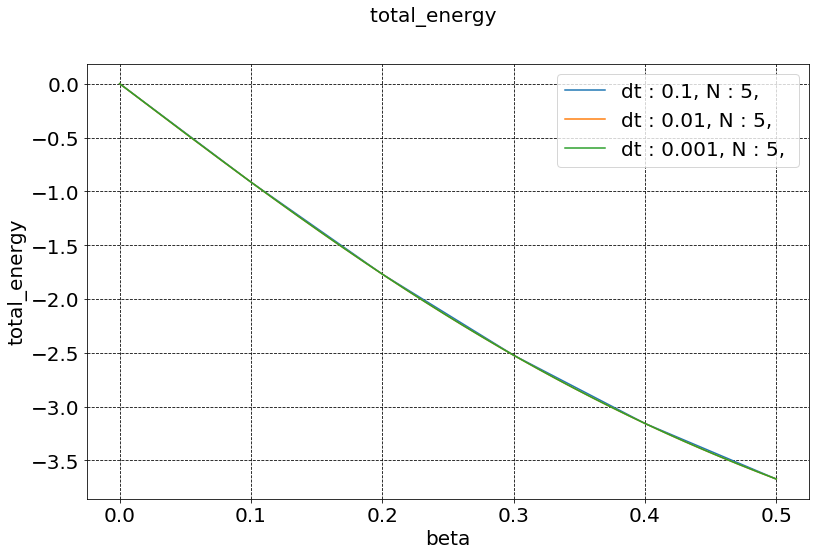

In [219]:
result_file = 'result_thermalize.dat'
fsrplot.plot_result(directory=target_results_1,file=result_file,plot_value='total_energy',label=['dt','N'],silent=True)
fsrplot.show()

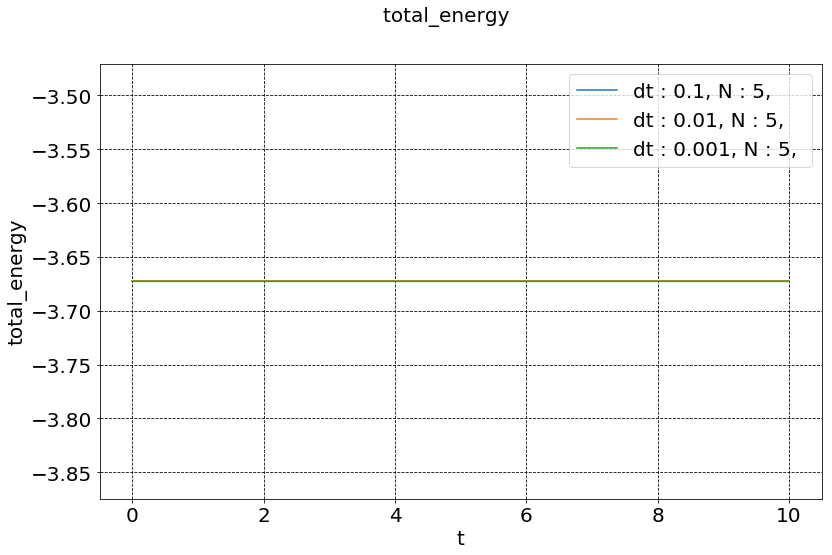

In [220]:
result_file = 'result_timedev.dat'
fsrplot.plot_result(directory=target_results_1,file=result_file,plot_value='total_energy',label=['dt','N'],silent=True)
fsrplot.show()

## Discretization

In [221]:
target_results_1_1 = [x for x in result_dataframe.index if \
                    result_dataframe.loc[x,'parameters']['command_name'] == 'xy_open_system' and \
                    result_dataframe.loc[x,'parameters']['t'] == 10 and \
                    result_dataframe.loc[x,'parameters']['N'] == 5 and \
                    result_dataframe.loc[x,'parameters']['J'] == 1.0 and \
                    result_dataframe.loc[x,'parameters']['relaxation'] == False and \
                    result_dataframe.loc[x,'parameters']['discrete'] in [True,False] and \
                    len(result_dataframe.loc[x,'files']) == 4]
result_dataframe.loc[target_results_1_1,:]

,files,directory,parameters,time_info,common_directory,common_parameter_number,variable_parameters,common_parameters
13,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-13,"{'N': 5, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.1, 't': 10.0, 'N_time': 100, 'T': 2.0, 'tagged': 2, 'relaxation': False, 'discrete': True, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-13/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:29:25', 'end_time': '2019/06/24 19:29:26', 'duration': '0:00:01.003359'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29,0,"{'N': 5, 'dt': 0.1, 'N_time': 100, 'tagged': 2, 'discrete': True}","{'command_name': 'xy_open_system', 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
14,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-14,"{'N': 5, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.1, 't': 10.0, 'N_time': 100, 'T': 2.0, 'tagged': 2, 'relaxation': False, 'discrete': False, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-14/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:29:26', 'end_time': '2019/06/24 19:29:27', 'duration': '0:00:01.022949'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29,0,"{'N': 5, 'dt': 0.1, 'N_time': 100, 'tagged': 2, 'discrete': False}","{'command_name': 'xy_open_system', 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
15,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-15,"{'N': 5, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.01, 't': 10.0, 'N_time': 1000, 'T': 2.0, 'tagged': 2, 'relaxation': False, 'discrete': True, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-15/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:29:27', 'end_time': '2019/06/24 19:29:34', 'duration': '0:00:07.156973'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29,0,"{'N': 5, 'dt': 0.01, 'N_time': 1000, 'tagged': 2, 'discrete': True}","{'command_name': 'xy_open_system', 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
16,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-16,"{'N': 5, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.01, 't': 10.0, 'N_time': 1000, 'T': 2.0, 'tagged': 2, 'relaxation': False, 'discrete': False, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-16/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:29:34', 'end_time': '2019/06/24 19:29:42', 'duration': '0:00:07.226614'}",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29,0,"{'N': 5, 'dt': 0.01, 'N_time': 1000, 'tagged': 2, 'discrete': False}","{'command_name': 'xy_open_system', 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 't': 10.0, 'T': 2.0, 'relaxation': False}"
17,"[parameter.json, condi.dat, result_thermalize.dat, result_timedev.dat]",/home/fumihiro/noise-project/QDproject/results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-17,"{'N': 5, 'J': 1.0, 'h': 0.5, 'V': 1.0, 'coef': 1.0, 'dt': 0.001, 't': 10.0, 'N_time': 10000, 'T': 2.0, 'tagged': 2, 'relaxation': False, 'discrete': True, 'result_directory': 'results/TrialExperiments/2019-06-24-19-27-29/experiment_1/number-17/', 'command_name': 'xy_open_system'}","{'start_time': '2019/06/24 19:29

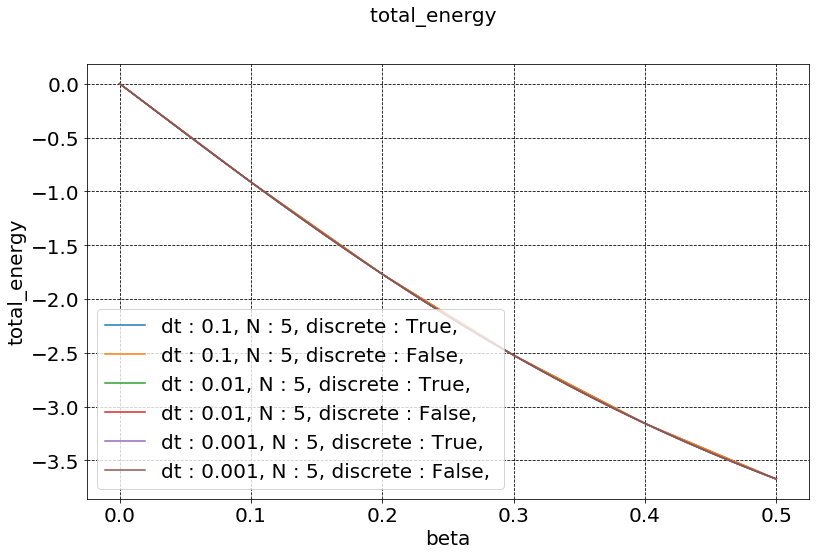

In [222]:
result_file = 'result_thermalize.dat'
fsrplot.plot_result(directory=target_results_1_1,file=result_file,plot_value='total_energy',label=['dt','N','discrete'],silent=True)
fsrplot.ax['normal']['total_energy'].legend(loc='lower left')
fsrplot.show()

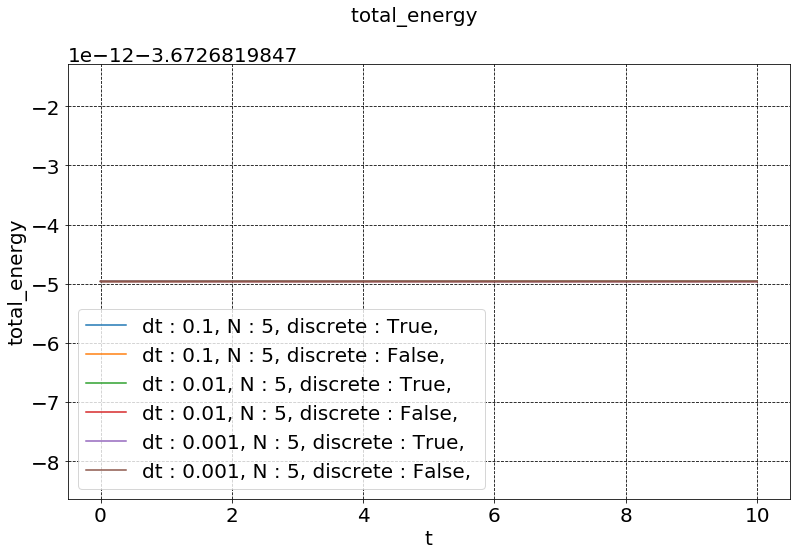

In [223]:
result_file = 'result_timedev.dat'
fsrplot.plot_result(directory=target_results_1_1,file=result_file,plot_value='total_energy',label=['dt','N','discrete'],silent=True)
fsrplot.ax['normal']['total_energy'].legend(loc='lower left')
fsrplot.show()

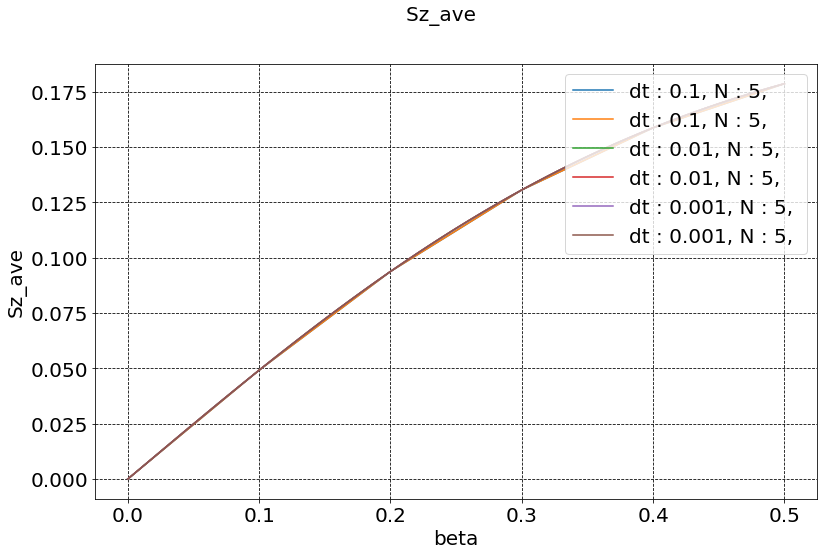

In [224]:
result_file = 'result_thermalize.dat'
fsrplot.plot_result(directory=target_results_1_1,file=result_file,plot_value='Sz_ave',label=['dt','N'],silent=True)
fsrplot.show()